## Final Project Submission

Please fill out:
* Student name: Henry Mativo
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### Overview 

In this project I will be examining the "SyriaTel Customer Churn" data. 

Syriatel is the leading telecommunications company, founded in the January 2000, with its headquarters located in Damascus, Syria.

## BUSINESS UNDERSTANDING

Syriatel wants to accurately predict whether a customer will stop using their services. They have hired me, a data scientist to create a model that accurate in predicting which customer will stop doing business with SyriaTel

### Business Objectives

1. 
2. 
3. 
4. 


## Data Understanding

SyriaTel has provided me with that includes information about their customers. The dataset provided contains the customer's telephone numbers, state of residence and length of account.

There are columns indicating if the customers has an international plan and voicemail plan, how many voice mails they receive.

The dataset includes how many minutes they spend talking, how many calls they make and how much they are charged during day, evening and night periods.

The purpose of this exercise is to analyze and comprehend the information contained within the columns of the provided CSV file. Our aim is to carefully examine the data, identify patterns and correlations between the variables, and extract meaningful insights from it.

#### Importing the libraries

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np

#To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#To help with missing data
import missingno as msno

### Loading the data

In [2]:
df = pd.read_csv("SyriaTel_data.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

### Data Cleaning
#### Detecting missing values
We will start by visualizing our missing data.

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

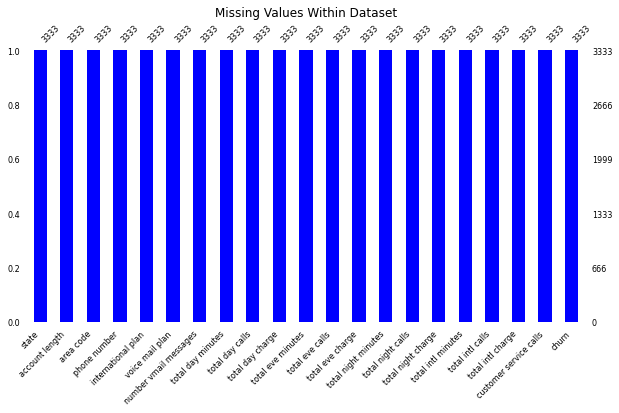

In [6]:
# Visualise the missing values in the dataset
msno.bar(df, color='blue', figsize=(10, 5), fontsize=8)
plt.title('Missing Values Within Dataset');

# checking for missing values in the data
df.isnull().sum()

There are no missing values in our dataset

#### Detecting duplicate values

In [7]:
# cheking for dublicates in the data
df.duplicated().sum()

0

There are no duplicate values in our dataset.

#### Detecting outliers

We shall now check for outliers that may effect our analysis.

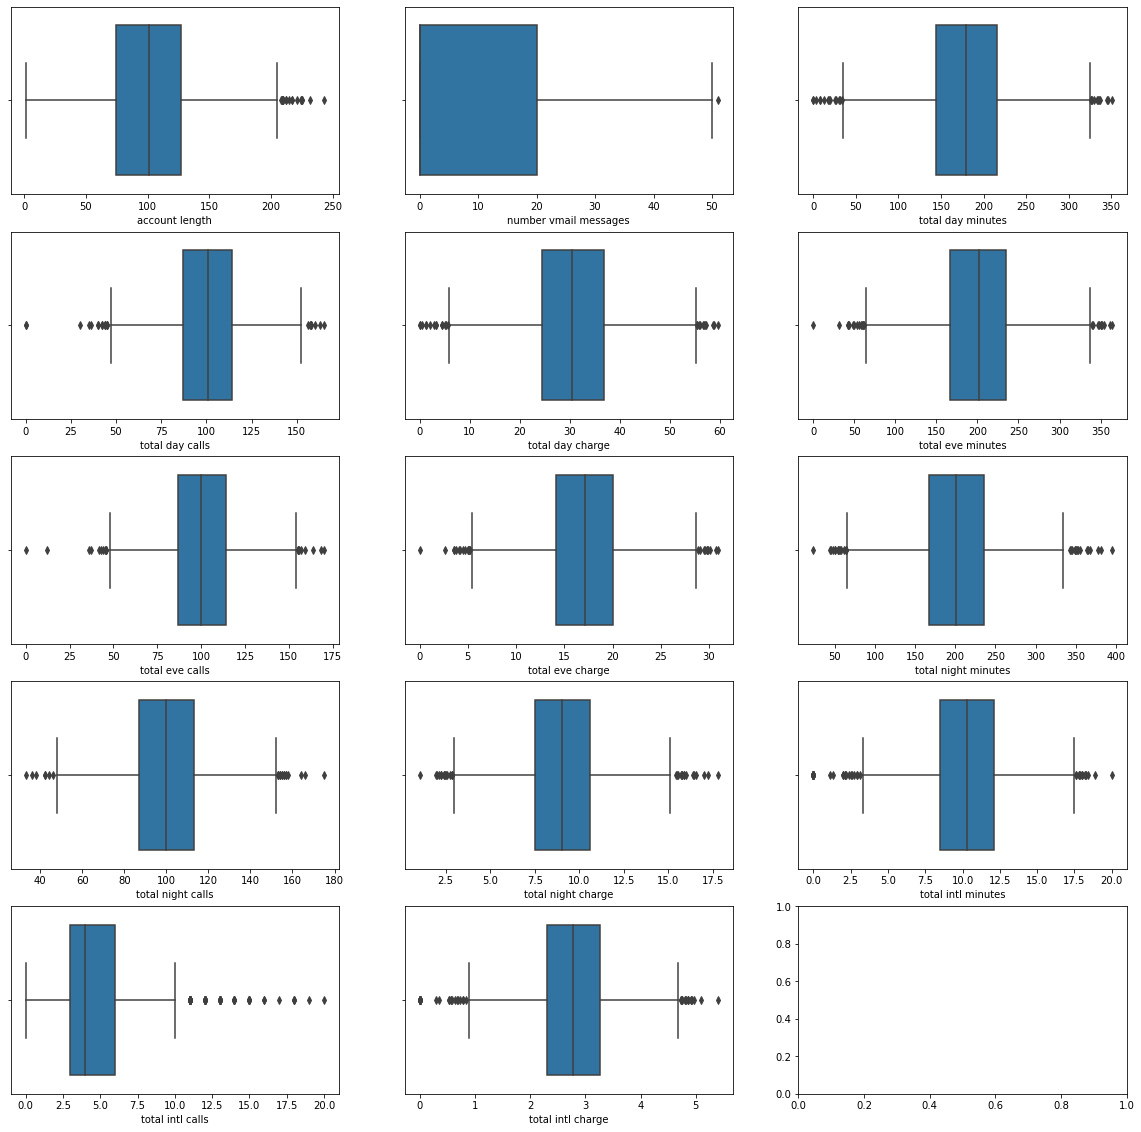

In [8]:
# Function that check for outliers
def fun_outlier_plot_box(df, column_name):
    """
    Create a box plot for a specified column of a Pandas DataFrame using Seaborn.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the column to plot.
        column_name (str): The name of the column to plot.

    Returns:
        None
    """
    sns.boxplot(x=df[column_name])


# List of all numerical columns
numerical_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',\
                 'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',\
                 'total night charge','total intl minutes','total intl calls','total intl charge']


# Iterate through the columns of df and call create a plot that will show us the ouliers


fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(20,20))
for idx,column in enumerate(numerical_cols):
    i = idx // 3
    j = idx % 3
    sns.boxplot(x = column, ax=ax[i,j], data = df)


There aren't really concerning outliers even though the individual columns look like they have outliers. If you compare similar columns e.g (total night calls,total night minutes and total night charge)
they have the same pattern of outliers meaning thattogether they are not ouliers. Same for columns like (total eve calls,total eve charge,total eve minutes) 

## Data Preporocessing

I will remove the column 'phone number' from the dataset because most digit in the phone number is random, and we will not use for modeling.

In [9]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
print(df.columns)
df = df.drop("phone number", axis=1)
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')


## Exploratory Data Analysis
This section will be the exploratory data analysis question where we will exploring and seeing the relationship that price has with other columns.


In [11]:
df.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

### Univariate Analysis
In this section, we'll explore each column in the dataset to see the distributions of features and obtain some useful insights. The main two parts in this section are: 
>   - Categorical Columns
>   - Numerical Columns

#### Categorical Columns

The Categorical Columns in the dataset that we shall be analysing are:

- `state`
- `international plan`
- `voice mail plan`
- `churn`



In [12]:
categorical_columns = ['state', 'international plan', 'voice mail plan', 'churn']

In [13]:
# Function to demonstrate the distribution of data
def fun_plot_value_counts(df, columns, title):
    '''
    Plots the value counts of multiple columns in a dataframe as bar charts
    '''
    for col in columns:
        counts = df[col].value_counts(dropna=False)
        counts.plot(kind='bar', figsize=(10, 5), color='lightgreen', edgecolor='black')
        plt.title(f"{title} - {col}")
        plt.xticks(rotation=0)
        plt.show()
        print(counts)

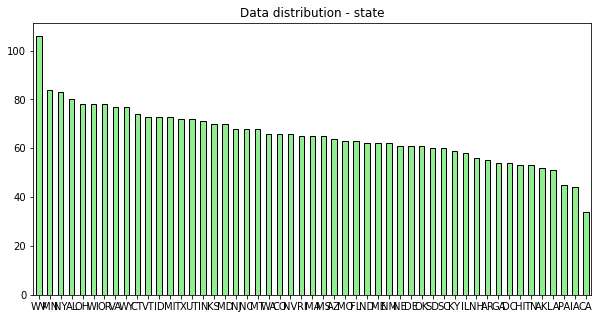

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
TX     72
UT     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
WA     66
CO     66
NV     66
RI     65
MA     65
MS     65
AZ     64
MO     63
FL     63
ND     62
ME     62
NM     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64


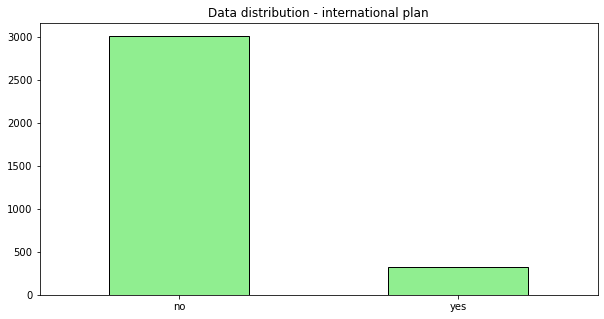

no     3010
yes     323
Name: international plan, dtype: int64


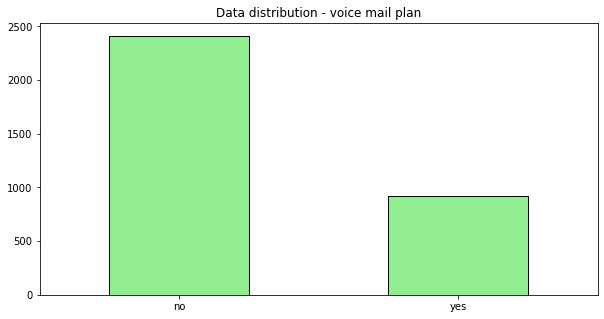

no     2411
yes     922
Name: voice mail plan, dtype: int64


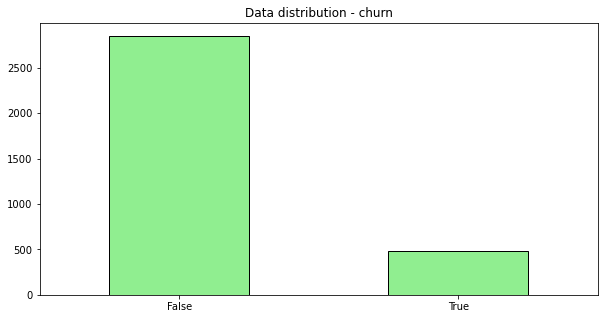

False    2850
True      483
Name: churn, dtype: int64


In [14]:
fun_plot_value_counts(df, categorical_columns, 'Data distribution')

###  Numerical Columns

The Numerical Columns in the dataset that we shall be analysing are:

- `account length`
- `number vmail messages`
- `total day minutes`
- `total day calls`
- `total day charge `
- `total eve minutes`
- `total eve charge`
- `total night minutes`
- `total night calls`
- `total night charge`
- `total intl minutes`
- `total intl minutes`
- `total intl calls`
- `total intl charge`
- `customer service calls`



In [17]:
# List of all numerical columns
numerical_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',\
                 'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',\
                 'total night charge','total intl minutes','total intl calls','total intl charge', 'customer service calls', 'area code']

len(numerical_cols)

16

In [18]:
def fun_describe_and_plot_distribution(df, columns, title):
    '''
    Returns the statistics of multiple columns in a dataframe and
    plots the distribution of each column as a histogram, kde, and boxplot
    '''
    for col in columns:
        # print the statistics
        print(df[col].describe())

        # create a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))

        # assign a graph to each ax
        sns.boxplot(df[col], ax=ax_box, color='lightgreen')
        sns.histplot(data=df, x=col, ax=ax_hist, kde=True, color='lightgreen', bins='auto', edgecolor='black')

        # set the title and layout
        plt.suptitle(f"{title} - {col} Column Data Distribution")
        plt.tight_layout()

        # show the plot
        plt.show()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account length, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


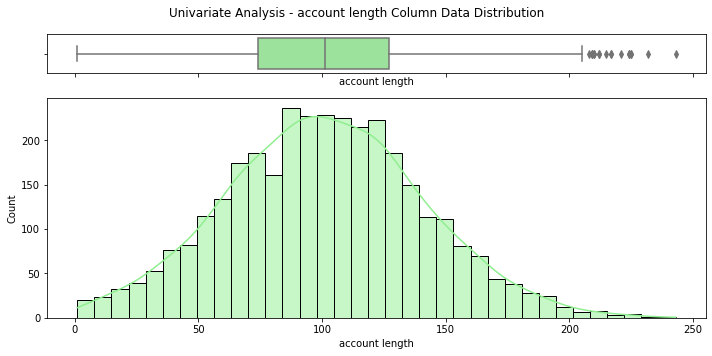

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: number vmail messages, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


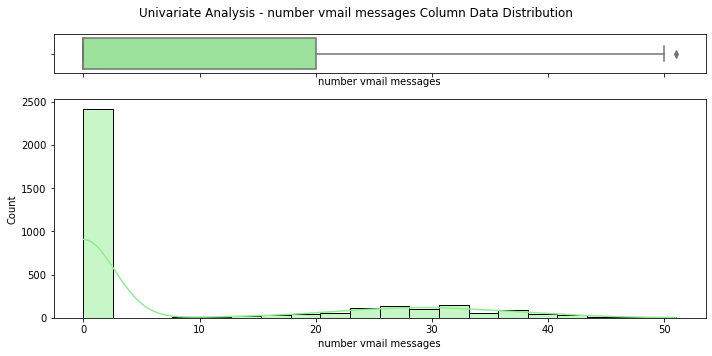

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total day minutes, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


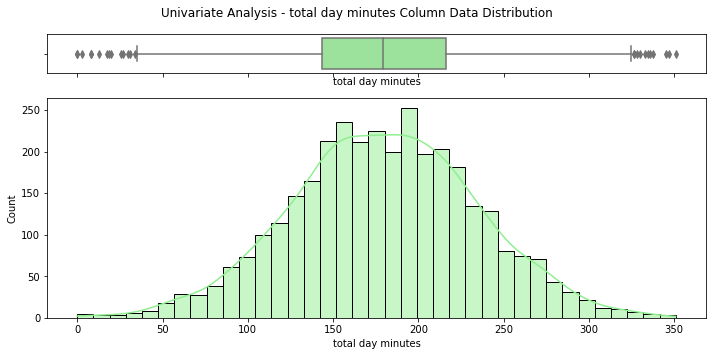

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: total day calls, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


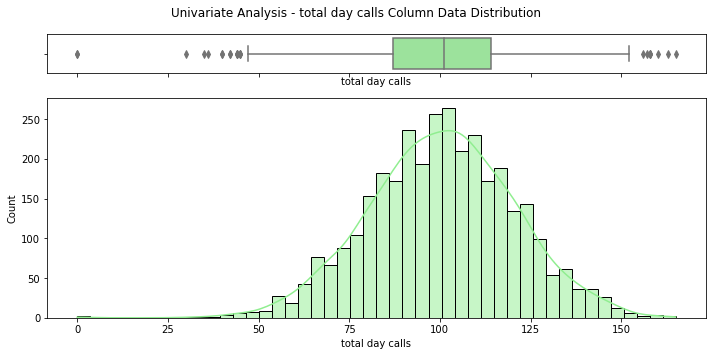

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: total day charge, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


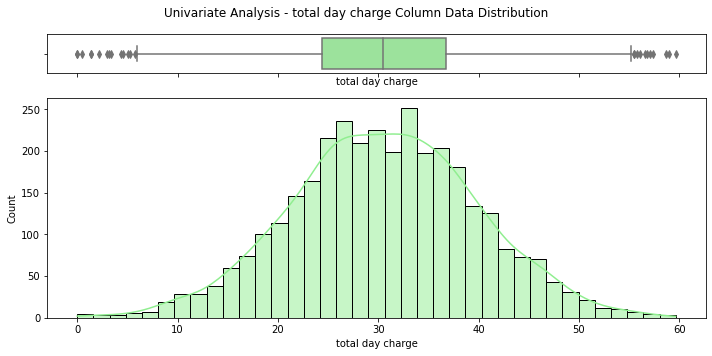

count    3333.000000
mean      200.980348
std        50.713844
min         0.000000
25%       166.600000
50%       201.400000
75%       235.300000
max       363.700000
Name: total eve minutes, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


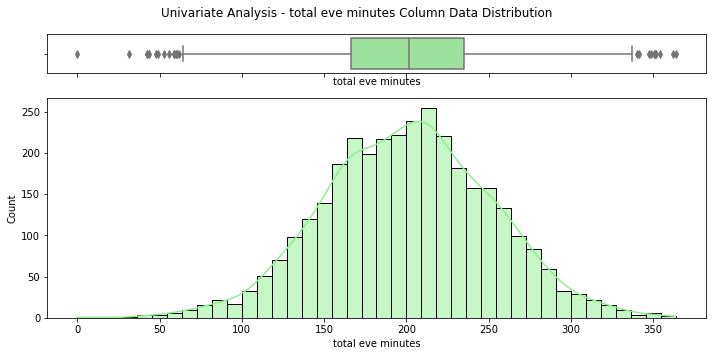

count    3333.000000
mean      100.114311
std        19.922625
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: total eve calls, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


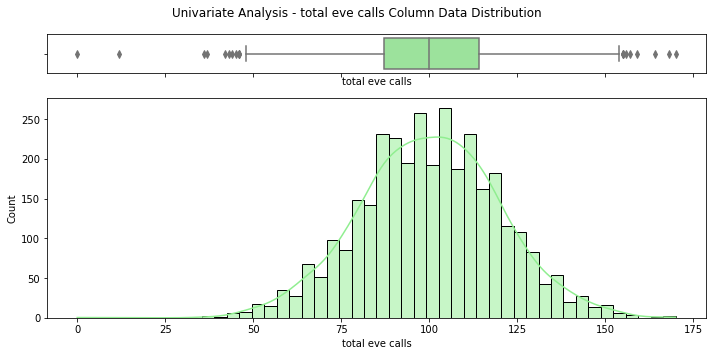

count    3333.000000
mean       17.083540
std         4.310668
min         0.000000
25%        14.160000
50%        17.120000
75%        20.000000
max        30.910000
Name: total eve charge, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


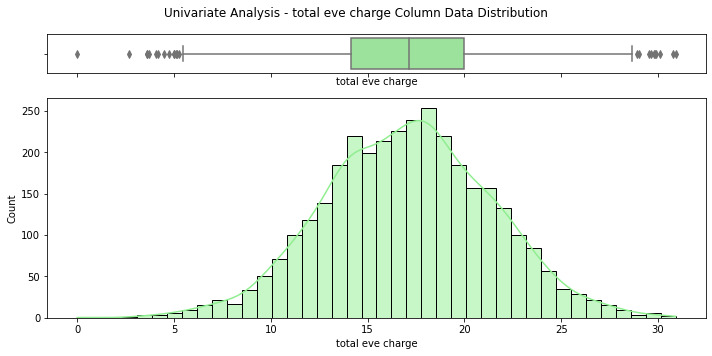

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: total night minutes, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


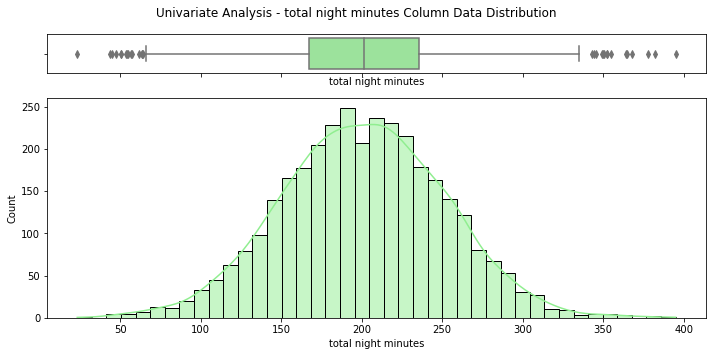

count    3333.000000
mean      100.107711
std        19.568609
min        33.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: total night calls, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


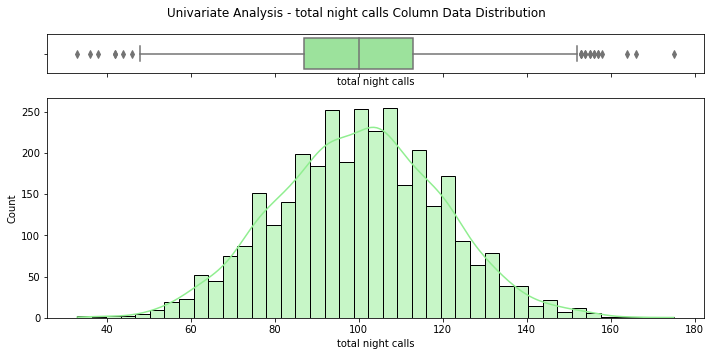

count    3333.000000
mean        9.039325
std         2.275873
min         1.040000
25%         7.520000
50%         9.050000
75%        10.590000
max        17.770000
Name: total night charge, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


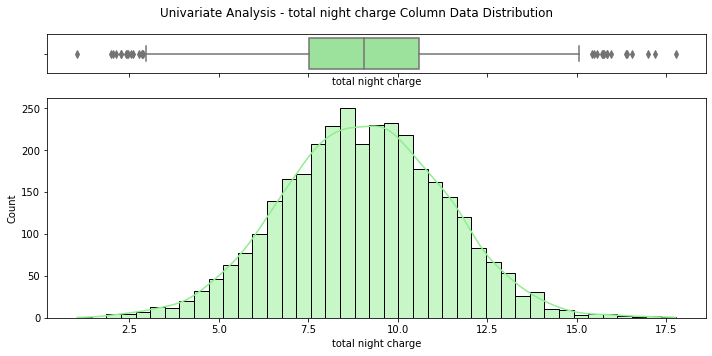

count    3333.000000
mean       10.237294
std         2.791840
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: total intl minutes, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


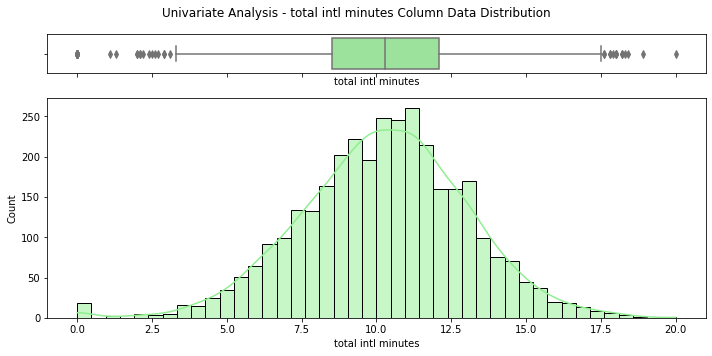

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: total intl calls, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


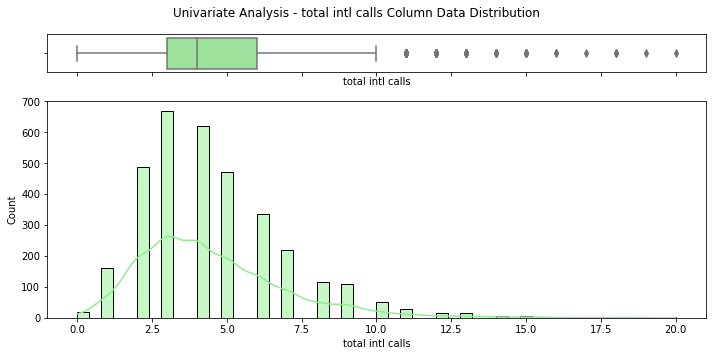

count    3333.000000
mean        2.764581
std         0.753773
min         0.000000
25%         2.300000
50%         2.780000
75%         3.270000
max         5.400000
Name: total intl charge, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


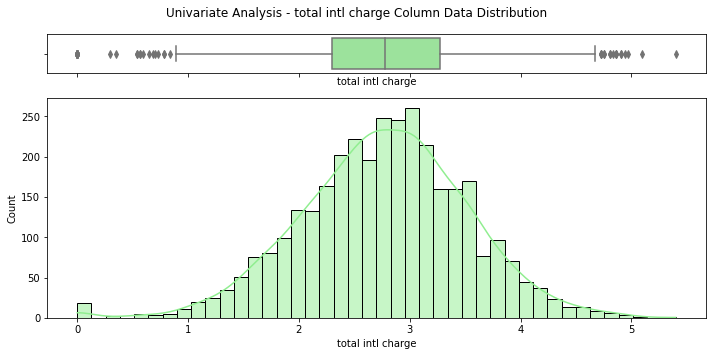

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: customer service calls, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


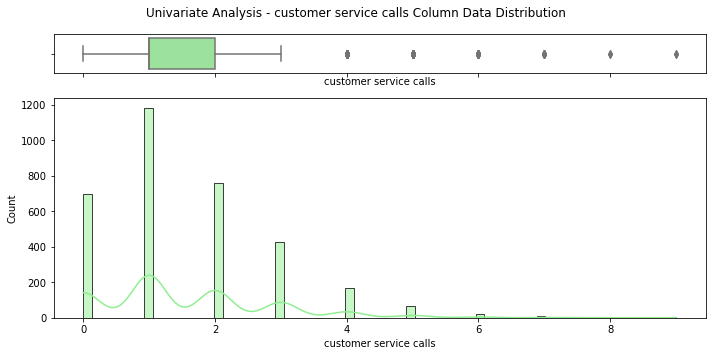

count    3333.000000
mean      437.182418
std        42.371290
min       408.000000
25%       408.000000
50%       415.000000
75%       510.000000
max       510.000000
Name: area code, dtype: float64


/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


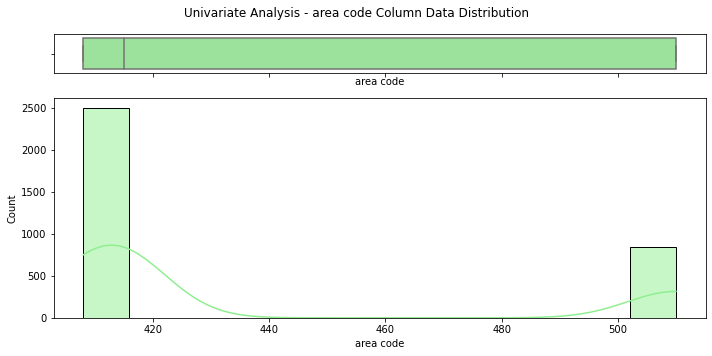

In [19]:
fun_describe_and_plot_distribution(df, numerical_cols, 'Univariate Analysis')

From the analysis above, all columns except the number of vmails messages, intl calls and customer service calls have a normal distribution.

### Multivariate Analysis
In this section, I will be exploring the relationship between the churn column and other columns.

In [20]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

#### 1. What is the relationship between the length of the account and those who churned

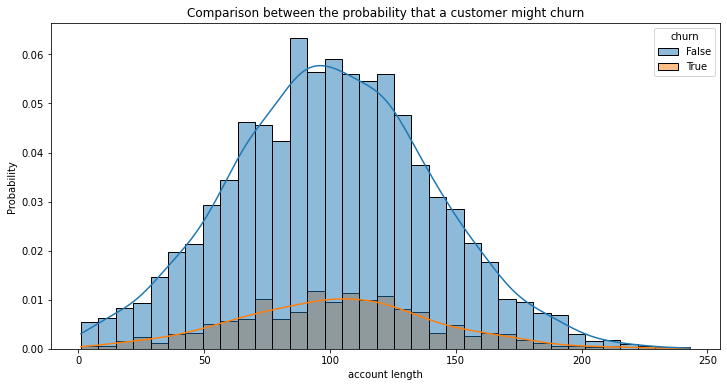

In [21]:
plt.figure(figsize=(12, 6))

sns.histplot(x ='account length', hue='churn', kde=True, stat='probability', data = df )
plt.title('Comparison between the probability that a customer might churn')
plt.show()

The plot above shows that their is a normal distribution for both customers who churned and those who did not. This does not present us with any clear trend on whether they churn or not.